In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading dataset
df = pd.read_csv(r'C:\Users\admin\Desktop\Mall_Customers.csv')
# Obtaining first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Obtaining rows and columns
df.shape

(200, 5)

In [5]:
# Obtaining feature names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Obtaining statistics information of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
# Obtaining rudimentary information of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Checking the number of null values present in the dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Creating a copy of dataset
df_copy = df.copy(deep=True)
df_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Dropping customerid since it dont provide any significance
df_copy.drop('CustomerID', 1, inplace=True)

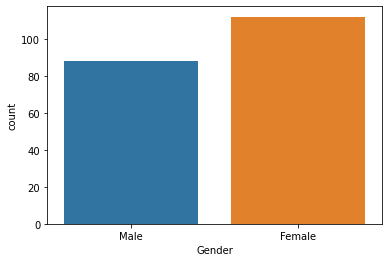

In [11]:
sns.countplot(df_copy['Gender'])

Text(0, 0.5, 'Count')

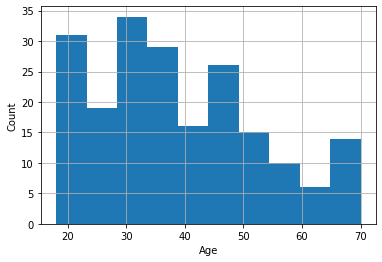

In [18]:
df_copy['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Count')

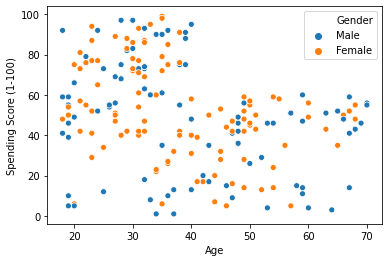

In [20]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df_copy)

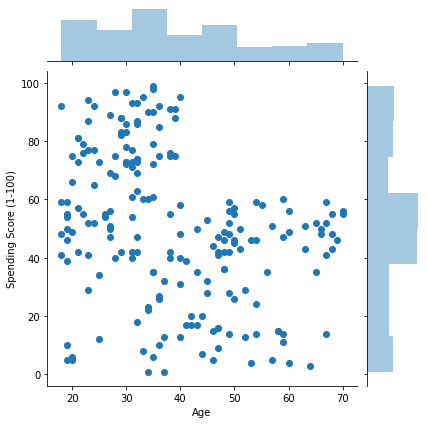

In [19]:
sns.jointplot(x='Age', y='Spending Score (1-100)', data=df_copy)

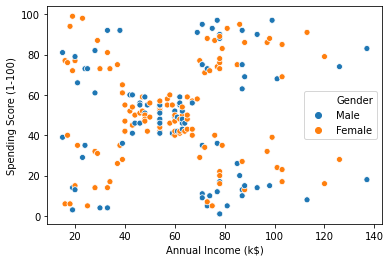

In [21]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df_copy)

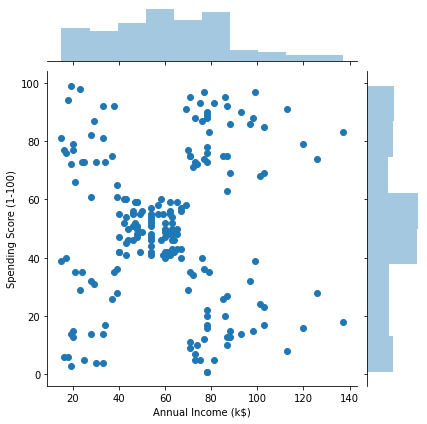

In [22]:
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_copy)

In [23]:
X = df_copy[['Annual Income (k$)', 'Spending Score (1-100)']]

In [24]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method')

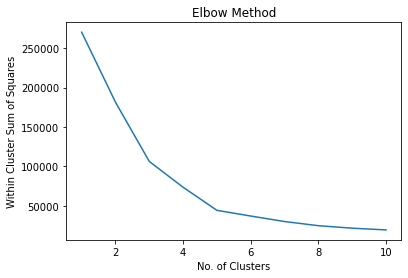

In [25]:
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Method')

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

In [27]:
km = KMeans(n_clusters=5, init='k-means++', random_state=42)
y = km.fit_predict(X)

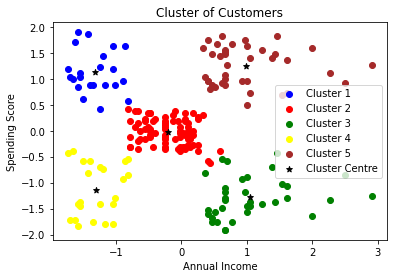

In [31]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], c='green', label='Cluster 3')
plt.scatter(X[y==3, 0], X[y==3, 1], c='yellow', label='Cluster 4')
plt.scatter(X[y==4, 0], X[y==4, 1], c='brown', label='Cluster 5')
plt.scatter(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], c='black', marker='*', label='Cluster Centre')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Cluster of Customers')
plt.legend()